In [18]:
#-*- coding : utf-8-*-
# coding:unicode_escape
import pandas as pd
import numpy as np

data = pd.read_csv(r'D:\Crawler\51job\人力-1-模型.csv', encoding='gb18030')

In [19]:
data.dropna(inplace=True,axis=0)

In [20]:
data.isnull().sum()

职位名称      0
薪酬        0
工作经验要求    0
学历要求      0
公司福利      0
公司名称      0
规模类型      0
公司标签      0
地区        0
薪酬_n      0
月薪最小值     0
月薪最大值     0
平均月薪      0
公司规模      0
公司类型      0
dtype: int64

In [21]:
data['月薪'] = (data['月薪最大值']+data['月薪最小值'])/2

In [22]:
data.head()

,职位名称,薪酬,工作经验要求,学历要求,公司福利,公司名称,规模类型,公司标签,地区,薪酬_n,月薪最小值,月薪最大值,平均月薪,公司规模,公司类型,月薪
0,人力资源管理岗,1-2万,5-7年,硕士,节假日福利\n五险一金,赣江新区创新产业投资有限公司,民营 | 50-150人,金融/投资/证券,三线,10000-20000,10000.0,20000.0,15000.00,50-150人,民营,15000.0
1,人力资源管理岗,8千-1.6万·13薪,5-7年,大专,五险一金\n员工旅游\n定期体检\n周末双休\n免费工作餐\n高温补贴,芜湖麦可威电磁科技有限公司,民营 | 150-500人,电子技术/半导体/集成电路,三线,8000-16000,8000.0,16000.0,12000.00,150-500人,民营,12000.0
2,人力资源管理岗,8千-1.5万,5-7年,本科,招聘\n人才梯队\n职称评审\n人才管理体系\n五险一金\n补充医疗保险\n交通补贴\n餐饮...,中国核工业中原建设有限公司华东分公司,国企 | 150-500人,建筑/建材/工程,一线,8000-15000,8000.0,15000.0,11500.00,150-500人,国企,11500.0
3,企业人力资源管理培训师,9千-1.8万,3-4年,本科,五险一金\n员工旅游\n通讯补贴\n专业培训\n绩效奖金\n年终奖金\n定期体检\n弹性工作,广东向上人力资源有限公司,民营 | 50-150人,专业服务(咨询、人力资源、财会),三线,9000-18000,9000.0,18000.0,13500.00,50-150人,民营,13500.0
4,人力资源管理,5-9千·13薪,3-4年,本科,五险一金\n专业培训\n股票期权\n年终奖金\n周末双休,江苏奥力威传感高科股份有限公司,已上市 | 500-1000人,汽车,三线,5000-9000,5000.0,9000.0,7000.00,500-1000人,已上市,7000.0


In [23]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

# 假设您已经有一个包含特征和标签的数据集，可以使用以下代码导入数据：

X = data[['地区', '工作经验要求', '学历要求', '公司规模', '公司类型', '公司标签']]
y = data['月薪']
# 对于分类特征，需要进行独热编码。
X = pd.get_dummies(X, columns=['地区', '工作经验要求', '学历要求', '公司规模', '公司类型', '公司标签'])

In [24]:
data1 = pd.concat([X,y],axis=1)
data1

,地区_一线,地区_三线,地区_二线,工作经验要求_10年以上,工作经验要求_1年,工作经验要求_2年,工作经验要求_3-4年,工作经验要求_5-7年,工作经验要求_8-9年,工作经验要求_无需经验,...,公司标签_计算机软件,公司标签_贸易/进出口,公司标签_通信/电信/网络设备,公司标签_通信/电信运营、增值服务,公司标签_酒店/旅游,公司标签_采掘业/冶炼,公司标签_金融/投资/证券,公司标签_银行,公司标签_餐饮业,月薪
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,15000.0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,12000.0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,11500.0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,13500.0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,12000.0
996,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,7500.0
997,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7500.0
998,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,8500.0


In [25]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 927 entries, 0 to 999
Data columns (total 90 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   地区_一线                   927 non-null    uint8  
 1   地区_三线                   927 non-null    uint8  
 2   地区_二线                   927 non-null    uint8  
 3   工作经验要求_10年以上            927 non-null    uint8  
 4   工作经验要求_1年               927 non-null    uint8  
 5   工作经验要求_2年               927 non-null    uint8  
 6   工作经验要求_3-4年             927 non-null    uint8  
 7   工作经验要求_5-7年             927 non-null    uint8  
 8   工作经验要求_8-9年             927 non-null    uint8  
 9   工作经验要求_无需经验             927 non-null    uint8  
 10  学历要求_中技/中专              927 non-null    uint8  
 11  学历要求_初中及以下              927 non-null    uint8  
 12  学历要求_大专                 927 non-null    uint8  
 13  学历要求_本科                 927 non-null    uint8  
 14  学历要求_硕士                 927 non-null    ui

In [26]:
from sklearn.ensemble import RandomForestRegressor

# 创建一个随机森林回归模型，并拟合数据。
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 计算各特征的重要性。
feature_importance = model.feature_importances_


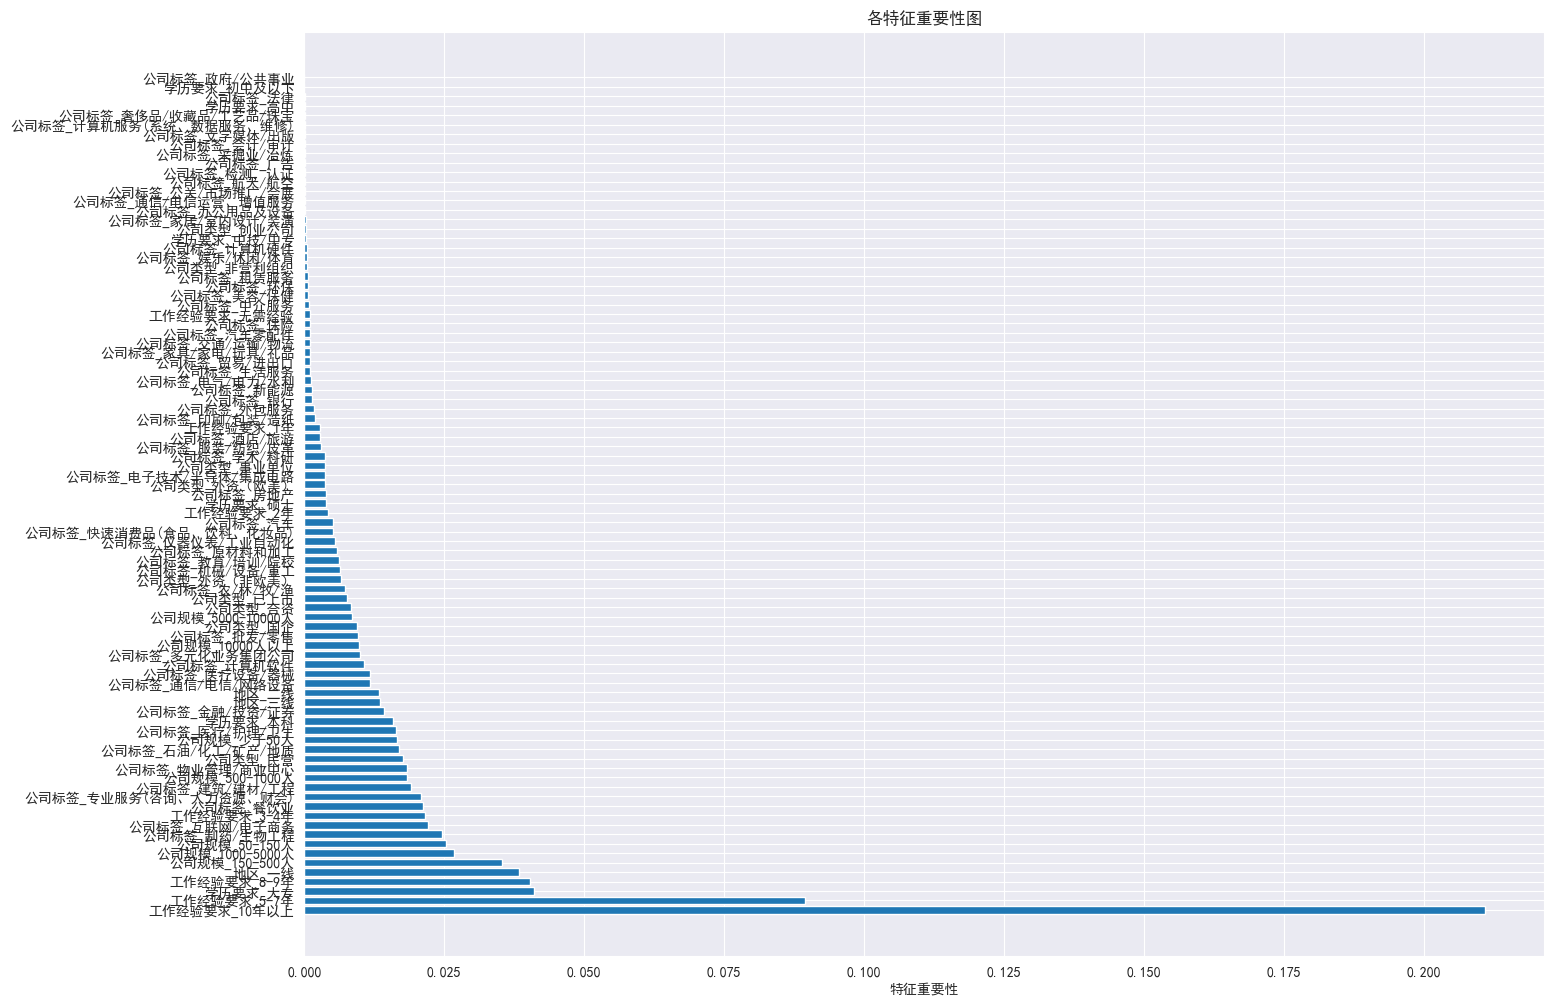

In [27]:

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  # 显示中文
# 将各特征的重要性按照从大到小的顺序排列。
sorted_idx = feature_importance.argsort()[::-1]
pos = np.arange(sorted_idx.shape[0]) + 0.5

# 画出特征重要性柱状图。
plt.figure(figsize=(16, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('特征重要性')
plt.title('各特征重要性图')
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
from scipy import stats

# y = stats.boxcox(y)[0]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ss = StandardScaler()
X_train = ss.fit_transform(X_train) # fit_transform for train data
X_test = ss.transform(X_test)

In [30]:
X_train

array([[ 1.37641972, -0.88873791, -0.52058814, ..., -0.14373989,
        -0.06375767, -0.19069252],
       [-0.72652257, -0.88873791,  1.92090432, ..., -0.14373989,
        -0.06375767, -0.19069252],
       [ 1.37641972, -0.88873791, -0.52058814, ..., -0.14373989,
        -0.06375767, -0.19069252],
       ...,
       [-0.72652257, -0.88873791,  1.92090432, ..., -0.14373989,
        -0.06375767, -0.19069252],
       [-0.72652257,  1.12519112, -0.52058814, ..., -0.14373989,
        -0.06375767, -0.19069252],
       [ 1.37641972, -0.88873791, -0.52058814, ..., -0.14373989,
        -0.06375767, -0.19069252]])

In [31]:
y

0      15000.0
1      12000.0
2      11500.0
3      13500.0
4       7000.0
        ...   
995    12000.0
996     7500.0
997     7500.0
998     8500.0
999    22500.0
Name: 月薪, Length: 927, dtype: float64

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

models=[LinearRegression(),KNeighborsRegressor(),SVR(),Ridge(),Lasso(),MLPRegressor(alpha=20),DecisionTreeRegressor(),ExtraTreeRegressor(),XGBRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor()]
models_str=['LinearRegression','KNNRegressor','SVR','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','XGBoost','RandomForest','AdaBoost','GradientBoost','Bagging']
score_=[]

In [33]:
for name,model in zip(models_str,models):
    # print('开始训练模型：'+name)
    model=model   #建立模型
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=model.score(X_test,y_test)
    score_.append(str(score)[:5])
    print(name +' 得分:'+str(score))

LinearRegression 得分:-3.7834755616101517e+24
KNNRegressor 得分:0.2823105494112119
SVR 得分:-0.11580157769406596
Ridge 得分:0.4278245852079767
Lasso 得分:0.4279647104125114


D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.657e+06, tolerance: 3.392e+06
  model = cd_fast.enet_coordinate_descent(
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor 得分:-2.468507657003233
DecisionTree 得分:-0.22346597098926568
ExtraTree 得分:-0.26364153356562103
[14:55:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost 得分:0.46919413839050006
RandomForest 得分:0.40069911118519785
AdaBoost 得分:0.04371542507757609
GradientBoost 得分:0.4659637118673189
Bagging 得分:0.3188726670393367


In [34]:
# 模型 mse,rmse,mae,r2,adr

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

误差 = []
for name, model in zip(models_str, models):
    # print('开始训练模型：' + name)
    model = model  #建立模型
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    MAE = mean_absolute_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)
    def ad_r2(y_test,result_prediction,train_df):
        p = train_df.shape[0] # 特征数量
        n = train_df.shape[1] # 样本数量
        return (1-((1-r2_score(y_test,result_prediction))*(n-1))/(n-p-1))
    ADR = ad_r2(y_test,y_pred,X_train)
    print(name + ' MSE:' + str(MSE))
    print(name + ' RMSE:' + str(RMSE))
    print(name + ' MAE:' + str(MAE))
    print(name + ' R2:' + str(R2))
    print(name + ' ADR:' + str(ADR))
    print('=============================')

LinearRegression MSE:1.7867818245590933e+32
LinearRegression RMSE:1.3367055863424426e+16
LinearRegression MAE:1385550495020663.8
LinearRegression R2:-3.7834755616101517e+24
LinearRegression ADR:5.0987113234562535e+23
KNNRegressor MSE:33893557.52688172
KNNRegressor RMSE:5821.817373199001
KNNRegressor MAE:4170.591397849463
KNNRegressor R2:0.2823105494112119
KNNRegressor ADR:1.0967177207531598
SVR MSE:52694776.17531253
SVR RMSE:7259.11676275513
SVR MAE:4732.5842278816845
SVR R2:-0.11580157769406596
SVR ADR:1.1503683596279906
Ridge MSE:27021520.688106675
Ridge RMSE:5198.222839404509
Ridge MAE:3672.0626962598917
Ridge R2:0.4278245852079767
Ridge ADR:1.0771078660056632
Lasso MSE:27014903.143879205
Lasso RMSE:5197.586280561315
Lasso MAE:3670.6892454802255
Lasso R2:0.4279647104125114
Lasso ADR:1.0770889823640106


D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.657e+06, tolerance: 3.392e+06
  model = cd_fast.enet_coordinate_descent(
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor MSE:163094488.77464563
MLPRegressor RMSE:12770.845264689633
MLPRegressor MAE:10885.054951570131
MLPRegressor R2:-2.4534938962927937
MLPRegressor ADR:1.4654019339567623
DecisionTree MSE:54119365.10476352
DecisionTree RMSE:7356.586511743305
DecisionTree MAE:4057.590885816692
DecisionTree R2:-0.1459669696061323
DecisionTree ADR:1.1544335272976105
ExtraTree MSE:61486135.93809686
ExtraTree RMSE:7841.309580554568
ExtraTree MAE:4476.811315924219
ExtraTree R2:-0.3019569009609402
ExtraTree ADR:1.1754551413239858
[14:57:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost MSE:25067804.73268484
XGBoost RMSE:5006.775882010782
XGBoost MAE:3449.8346616683466
XGBoost R2:0.46919413839050006
XGBoost ADR:1.07153279605151
RandomForest MSE:28611832.26425681
RandomForest RMSE:5349.002922438612
RandomForest MAE:3409.4443848415613
RandomForest R2:0.39415004866966996
RandomForest ADR:1.